### Q1 (14 points)
Three friends called Alice, Bob and Carol play the game called rock, paper, scissors. Rules of the game are simple:
- Rock beats scissors, scissors beat paper and paper beats rock. \
[//]: #
They play for $N$ turns. Each turn they randomly select two people to play. Three friends follow the given policies:
- Alice: Believes rock is the best choice. Selects rock %80 of the time.
- Bob: Believes rock is the weakest choice. Selects rock only %20 of the time.
- Carol: Plays randomly. \
[//]: #
Code and run the game for N=1000000 trials. Please answer the following questions:

1. Let X and Y denote the names of the two players in a game and let S be the random variable that shows the choice of rock (S=1), paper (S=2) and scissors (S=3) by the player X. Plot the p.m.f of S. Compare with your theoretical solution.(**5 points**)

2. What is the probability that S=i will be selected in a game by at least one of the players? Compute separately for i=1, 2 and 3. Compare with your theoretical solution.(**4 points**)

3. A pair of players is about to be formed to play the game. What is the probability of winning for Alice, Bob and Carol? What is the probability of a draw? Compare with your theoretical solution.(**5 points**)


In [1]:
# Use only these three libraries, they should be enough for this project
import random
import math
import matplotlib.pyplot as plt
random.seed(0)


### Code Your MC Simulation here ###
...

Ellipsis

#### Q1 - Part 1 Solution
...

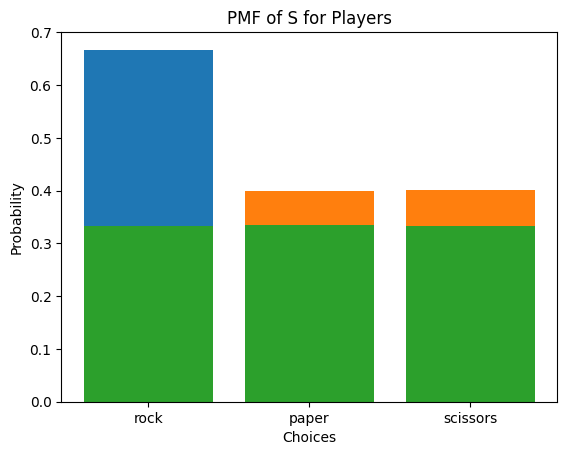

In [2]:
N = 1000000     #number of game trials

#defining players and their choice probabilities
players_probs = {
    'Alice': {'rock': 0.8, 'paper': 0.2, 'scissors': 0.2},
    'Bob': {'rock': 0.2, 'paper': 0.4, 'scissors': 0.4}, 
    'Carol': {'rock': 1/3, 'paper': 1/3, 'scissors': 1/3}
}

possible_game_choices = ['rock', 'paper', 'scissors']


#loop for each player and their respective choice probabilities
for player, probs in players_probs.items():
    prob_indices = list(range(3))       #for representing the indices for rock, paper, and scissors
    prob_names =  list(probs.keys())
    S = [0] * 3           #for initializing the count of rock, paper, and scissors

    #simulating game plays for N trials
    for n in range(N):
        #for selecting choices randomly for players X and Y based on their probabilities
        player_X = random.choices(prob_indices, weights=list(probs.values()))[0]     #for extracting a single element from a list or sequence of randomly sampled elements
        player_Y = random.choices(prob_indices, weights=list(probs.values()))[0]

        #for updating the count for the choice of player_X
        S[player_X] += 1
        
    #for calculating the probabilities based on the simulated counts
    total_simulated_probs = sum(S)
    S = [count / total_simulated_probs for count in S]

    #for plotting the probability mass function (PMF) for player's choices
    plt.bar(prob_names, S, label=player)

#for setting labels and title for the plot
plt.xlabel('Choices')
plt.ylabel('Probability')
plt.title('PMF of S for Players')
plt.legend
plt.show()


#### Q1 - Part 2 Solution
...

In [3]:
# Q1 - PART2 SOLUTION
#for calculating the combined probability of each choice (rock, paper, scissors) for all players
rock_choice_prob = 1 - (1- players_probs['Alice']['rock']) * (1 - players_probs['Bob']['rock']) * (1 - players_probs['Carol']['rock'])
paper_choice_prob = 1 - (1- players_probs['Alice']['paper']) * (1 - players_probs['Bob']['paper']) * (1 - players_probs['Carol']['paper'])
scissors_choice_prob = 1 - (1- players_probs['Alice']['scissors']) * (1 - players_probs['Bob']['scissors']) * (1 - players_probs['Carol']['scissors'])

print("Probability of selecting rock: ", rock_choice_prob)
print("Probability of selecting paper: ", paper_choice_prob)
print("Probability of selecting scissors: ", scissors_choice_prob)


Probability of selecting rock:  0.8933333333333333
Probability of selecting paper:  0.6799999999999999
Probability of selecting scissors:  0.6799999999999999


#### Q1 - Part 3 Solution
...

In [4]:
# Q1 - PART3 SOLUTION
num_wins_alice = 0
num_wins_bob = 0
num_wins_carol = 0
num_draws = 0

#simulating N games and keeping track of wins and draws
for n in range(N):
    #simulating choices for each player based on their defined probabilities
    player_X_result = random.choices(prob_names, weights=list(players_probs['Alice'].values()))[0]
    player_Y_result = random.choices(prob_names, weights=list(players_probs['Bob'].values()))[0]
    player_Z_result = random.choices(prob_names, weights=list(players_probs['Carol'].values()))[0]

    #determining winners or draws based on the rules
    if (player_X_result == 'rock' and player_Y_result == 'scissors') or (player_X_result == 'scissors' and player_Y_result == 'paper') or (player_X_result == 'paper' and player_Y_result == 'rock'):
        num_wins_alice += 1
    elif (player_Y_result == 'rock' and player_X_result == 'scissors') or (player_Y_result == 'scissors' and player_X_result == 'paper') or (player_Y_result == 'paper' and player_X_result == 'rock'):
        num_wins_bob += 1
    elif (player_Z_result == 'rock' and player_X_result == 'scissors') or (player_Z_result == 'scissors' and player_X_result == 'paper') or (player_Z_result == 'paper' and player_X_result == 'rock'):
        num_wins_carol += 1
    else:
        num_draws += 1

#calculating the probabilities of wins and draws
prob_wins_alice = num_wins_alice / N
prob_wins_bob = num_wins_bob / N
prob_wins_carol = num_wins_carol / N
prob_draws = num_draws / N


print("Probability of Alice winning:", prob_wins_alice)
print("Probability of Bob winning:", prob_wins_bob)
print("Probability of Carol winning:", prob_wins_carol)
print("Probability of a draw:", prob_draws)


Probability of Alice winning: 0.366308
Probability of Bob winning: 0.366333
Probability of Carol winning: 0.089464
Probability of a draw: 0.177895


### Q2 (16 points)
A probability course has 90 students enrolled. There are 14 weeks in each semester. Assume that, each student has a probability $p_w=0.6\left(1-4\left(\frac{\left(w-1\right)}{13}\cdot\left(1-\frac{\left(w-1\right)}{13}\right)\right)\right)+0.2$ to be present in class at week w. \
Code and run a Monte Carlo experiment for N=100000 trials in each week to the calculate number of students present in class. Please answer the following questions: 

0. Show $p_w$ for each week in a bar chart (**1 points**).
1. Show the pmf and cdf of the number of students present for the first week (**3 points**).
2. What is the probability that at least 60 students are present at week w? Show over a bar chart and comment on your findings (**3 points**).
3. Given that there are 30 students present in class, show the conditional pmf of w. What is the probability of the current week to be week 7 under this condition? (**3 points**)
- Also plot the theoretical values over experimental results with a different color for parts 1,2 and 3 (**2 points in each part**).

In [5]:
# Use only these three libraries, they should be enough for this project
import random
import math
import matplotlib.pyplot as plt
random.seed(0)


### Code Your MC Simulation here ###
...

Ellipsis

#### Q2 - Part 0 Solution
...

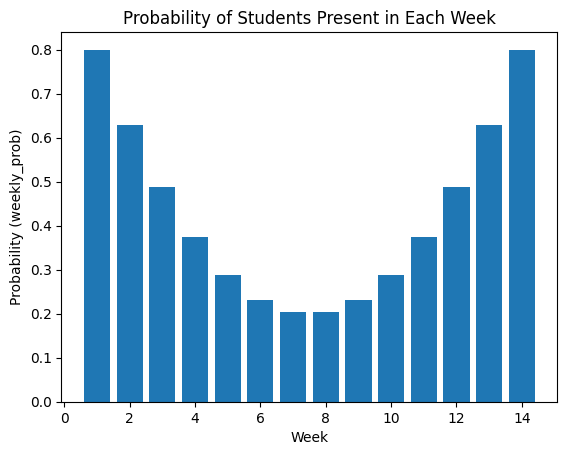

In [6]:
# Q2 - PART0 SOLUTION
num_weeks = 14
all_probs = []

#loop for each week to calculate the probability of students being present
for week in range(1, num_weeks+1):
    weekly_prob = 0.6 * (1 - 4 * ((week - 1) / 13) * (1 - (week - 1) / 13)) + 0.2        #Calculating the probability for the current week based on a complex function
    all_probs.append(weekly_prob)       #appending the calculated probability to the list for each week

plt.bar(range(1, num_weeks + 1), all_probs)
plt.xlabel('Week')
plt.ylabel('Probability (weekly_prob)')
plt.title('Probability of Students Present in Each Week')
plt.show()

#### Q2 - Part 1 Solution
...

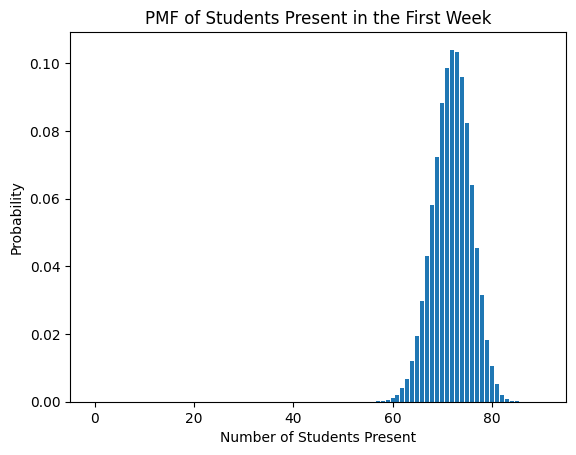

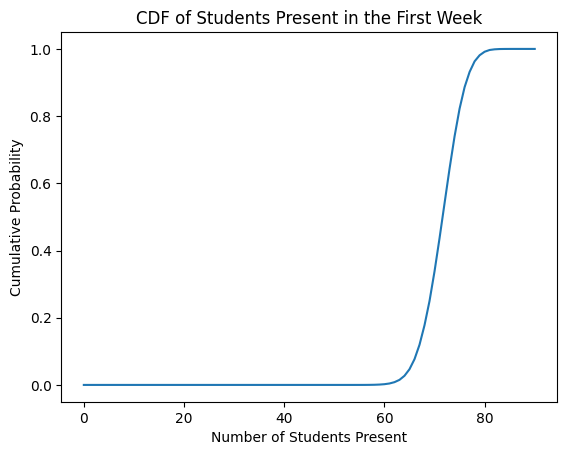

In [7]:
# Q2 - PART1 SOLUTION
N = 100000
present_students_week1 = []

#loop for the range of N
for n in range(N):
    present_students = sum(random.random() < all_probs[0] for x in range(90))
    present_students_week1.append(present_students)

#PMF
#creating a PMF by counting the occurrences of each count of present students and dividing by the total number of simulations
pmf = [present_students_week1.count(y) / N for y in range(91)]
plt.bar(range(91), pmf)
plt.xlabel('Number of Students Present')
plt.ylabel('Probability')
plt.title('PMF of Students Present in the First Week')
plt.show()

#CDF
#creating CDF by calculating the cumulative sum of probabilities up to each count of present students
cdf = [sum(pmf[0:i+1]) for i in range(len(pmf))]
plt.plot(range(91), cdf)
plt.xlabel('Number of Students Present')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Students Present in the First Week')
plt.show()



#### Q2 - Part 2 Solution
...

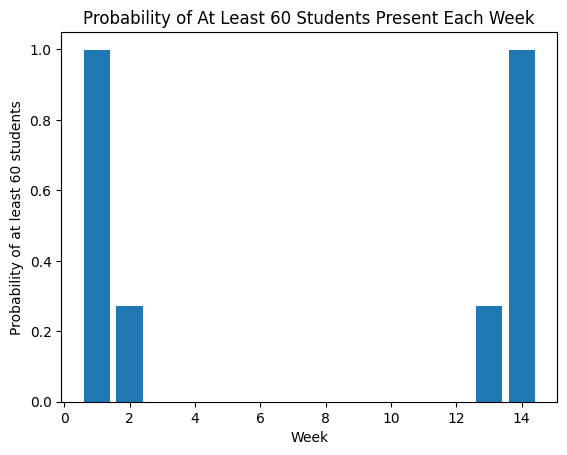

In [8]:
# Q2 - PART2 SOLUTION
at_least_60_all_probs = []

#loop for 14 weeks
for week in range(14):
    weekly_present_students = []

    #simulating N times for a chosen week
    for n in range(N):
        #simulating the number of students present using a probability distribution for this specific week
        present_students = sum(random.random() < all_probs[week] for x in range(90))
        weekly_present_students.append(present_students)        #appending the count of present students to the list

    at_least_60_count = sum(1 for at_least_60_students in weekly_present_students if at_least_60_students >= 60)        #counting the occurrences where at least 60 students were present in the simulations for this week
    at_least_60_prob = at_least_60_count / N        #calculating the probability of having at least 60 students present for this week

    at_least_60_all_probs.append(at_least_60_prob)      #appending the calculated probability to the list for all weeks

plt.bar(range(1, 15), at_least_60_all_probs)
plt.xlabel('Week')
plt.ylabel('Probability of at least 60 students')
plt.title('Probability of At Least 60 Students Present Each Week')
plt.show()

#### Q2 - Part 3 Solution
...

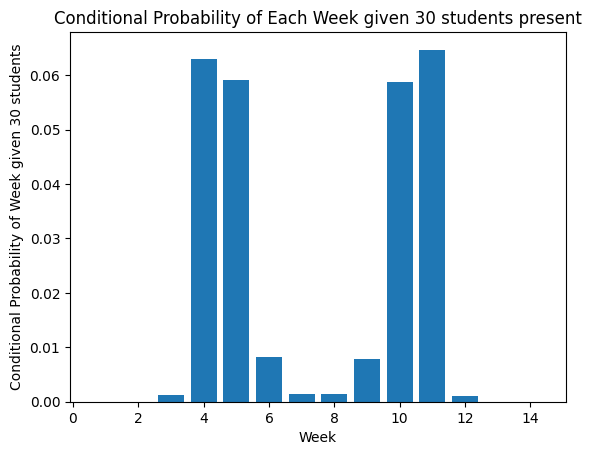

Probability of Week 7 given 30 students present: 0.00138


In [9]:
# Q2 - PART3 SOLUTION
students_present_30 = 30
conditional_pmf = []

#loop for 14 weeks
for week in range(14):
    count_30_students = sum(1 for present_count in range(N) if sum(random.random() < all_probs[week] for _ in range(90)) == students_present_30)        #initializing a count for the occurrence of exactly 30 students present for a particular week
    prob_30_students = count_30_students / N        #calculating the probability of exactly 30 students being present for a particular week

    #probability of being week 7 given 30 students
    if week == 6:  #week 7 corresponds to index 6
        week_7_30_students_prob = prob_30_students

    conditional_pmf.append(prob_30_students)        #appending the calculated probability to the list for all weeks


plt.bar(range(1, 15), conditional_pmf)
plt.xlabel('Week')
plt.ylabel('Conditional Probability of Week given 30 students')
plt.title('Conditional Probability of Each Week given 30 students present')
plt.show()

print(f"Probability of Week 7 given 30 students present: {week_7_30_students_prob}")